In [1]:
#computer conventional DFD optical flow and save matrix and images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from numpy.fft import fft
import glob
import time

In [2]:
#image folder setup
pathImage='../scout_video_09/'
filePrefix='gimbal0_'
fileSuffix='.jpg'
idxStart=2000
idxEnd=2500

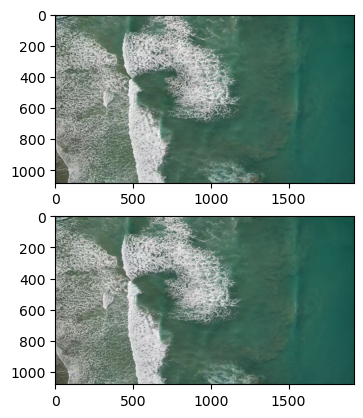

0.0078125
0.99609375
(1080, 1920, 3)
0.28515625
<class 'numpy.float64'>


In [4]:
#display sample images
idxFile=3
filename=filePrefix + str(idxFile + idxStart) + fileSuffix
img_0 = mpimg.imread(pathImage + filename) / 256
#imgplot_0 = plt.imshow(img_0)

idxFile=4
filename=filePrefix + str(idxFile + idxStart) + fileSuffix
img_1 = mpimg.imread(pathImage + filename) / 256

fig, (ax_0, ax_1) = plt.subplots(2)
imgplot_0 = ax_0.imshow(img_0)
imgplot_1 = ax_1.imshow(img_1)

plt.show()

print(np.min(img_0))
print(np.max(img_0))
print(img_0.shape)
print(img_0[1079,1919,2])
print(type(img_0[0,0,0]))

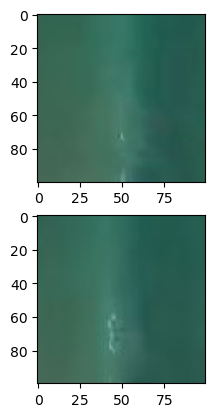

0.0078125
0.99609375


In [5]:
#analyze image section
tileSize=100
tileX=1500
tileY=500
resX=1920
resY=1080
searchRange=150
searchStep=1
DFD=np.zeros((searchRange*2+1, searchRange*2+1))
ref = img_0[tileY:tileY+tileSize, tileX:tileX+tileSize, :]
cont = img_1[tileY:tileY+tileSize, tileX:tileX+tileSize, :]
fig, (ax_0, ax_1) = plt.subplots(2)
imgplot_0 = ax_0.imshow(ref)
imgplot_1 = ax_1.imshow(cont)

plt.show()

print(np.min(img_0))
print(np.max(img_0))

(100, 100, 3)
300 300
0.002429237365722656
range(-150, 151)
0.004801509094238281
0.00022349751790364582


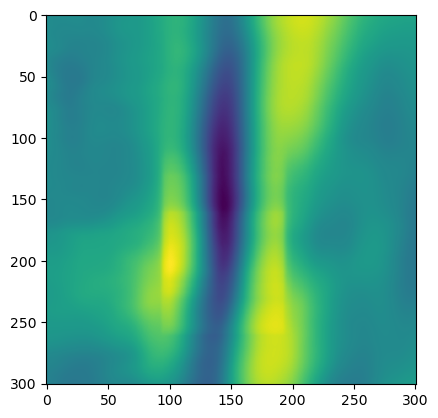

In [6]:
#display section DFD result
for i in range(-searchRange, searchRange+searchStep, searchStep):
    for j in range(-searchRange, searchRange+searchStep, searchStep):
        compare = img_1[tileY+j:tileY+j+tileSize, tileX+i:tileX+i+tileSize, :]
        diff = np.mean((ref-compare)**2)
        DFD[j+searchRange, i+searchRange] = diff
print(compare.shape)
print(j+searchRange,i+searchRange)
print(DFD[51,51])
imgplot_1 = plt.imshow(DFD)
print(range(-searchRange, searchRange+searchStep, searchStep))
print(DFD.max())
print(DFD.min())

In [8]:
#DFD processing on a single image
start = time.time()

tileSpan=15
dimX=1920
dimY=1080
searchRange=10
searchStep=1

noImages=2
idxStart=2000

idxFile=0
filename=filePrefix + str(idxFile + idxStart) + fileSuffix
img_ref = mpimg.imread(pathImage + filename) / 256
DFD=np.ones((dimY-2*searchRange-2*tileSpan, dimX-2*searchRange-2*tileSpan))
(dimDFDy,dimDFDx)=DFD.shape
print("DFD shape: ", DFD.shape)
DFDx=np.zeros((dimY-2*searchRange-2*tileSpan, dimX-2*searchRange-2*tileSpan))
DFDy=np.zeros((dimY-2*searchRange-2*tileSpan, dimX-2*searchRange-2*tileSpan))

idxFile=1
filename=filePrefix + str(idxFile + idxStart) + fileSuffix
img_compare = mpimg.imread(pathImage + filename) / 256

for i in range(-searchRange, searchRange+searchStep, searchStep):
    print("step i: ", i)
    for j in range(-searchRange, searchRange+searchStep, searchStep):
        refX1 = searchRange
        refX2 = dimX - searchRange
        refY1 = searchRange
        refY2 = dimY - searchRange
        #print("ref: ", refX1, refX2, refY1, refY2)
        ref = img_ref[refY1:refY2, refX1:refX2, :]
        #print("ref shape: ", ref.shape)
        diffX1 = searchRange + i
        diffX2 = dimX - searchRange + i 
        diffY1 = searchRange + j
        diffY2 = dimY - searchRange + j
        #print("diff: ", diffX1, diffX2, diffY1, diffY2)
        compare = img_compare[diffY1:diffY2, diffX1:diffX2, :]
        diff3=(ref-compare)**2
        diff=(diff3[:,:,0]+diff3[:,:,1]+diff3[:,:,2]) / 3
        #print("diff shape: ", compare.shape)
        tSum=np.zeros((dimY-2*searchRange-2*tileSpan, dimX-2*searchRange-2*tileSpan))
        #print("sum shape: ", sum.shape)
        dimDiffY=diff.shape[0]
        dimDiffX=diff.shape[1]
        for x in range(-tileSpan, tileSpan + 1):
            for y in range(-tileSpan, tileSpan + 1):
                #print(tileSpan+y, dimDiffY-tileSpan+y)
                #print(tileSpan+x, dimDiffX-tileSpan+x)
                tSum += diff[tileSpan+y:dimDiffY-tileSpan+y, tileSpan+x:dimDiffX-tileSpan+x]
        tSum = tSum / (tileSpan + 1)**2
        #print("sum complete")
        for x in range(dimDFDx):
            for y in range(dimDFDy):
                if tSum[y,x]<DFD[y,x]:
                    DFD[y,x]=tSum[y,x]
                    DFDx[y,x]=i
                    DFDy[y,x]=j

end = time.time()
print(end - start)

DFD shape:  (1030, 1870)
step i:  -10
step i:  -9
step i:  -8
step i:  -7
step i:  -6
step i:  -5
step i:  -4
step i:  -3
step i:  -2
step i:  -1
step i:  0
step i:  1
step i:  2
step i:  3
step i:  4
step i:  5
step i:  6
step i:  7
step i:  8
step i:  9
step i:  10
2304.8531091213226


In [9]:
#observe DFD results
print(DFDy.min(),DFDy.max(),DFDx.min(),DFDx.max())
np.save(pathImage + filePrefix +"DFD_" + str(idxFile + idxStart), DFD)
np.save(pathImage + filePrefix +"DFDx_" + str(idxFile + idxStart), DFDx)
np.save(pathImage + filePrefix +"DFDy_" + str(idxFile + idxStart), DFDy)

-10.0 10.0 -10.0 10.0


(1030, 1870)
(0, 1630)
0.0


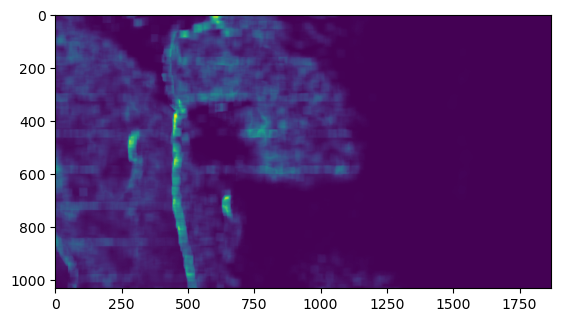

In [10]:
print(DFD.shape)
print(np.unravel_index(DFD.argmin(), DFD.shape))
print(np.min(DFD))
imgplot_1 = plt.imshow(DFD)

0.02680961528477234

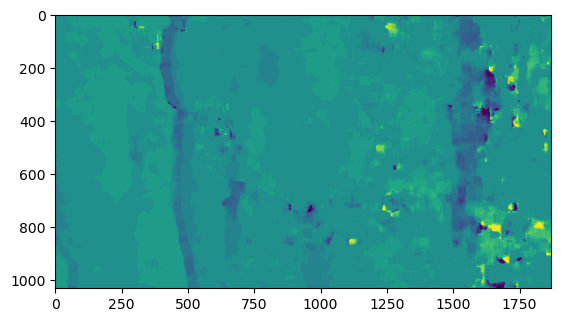

In [11]:
#observe DFD results
imgplot_1 = plt.imshow(DFDx)
np.max(DFDx)
np.mean(DFDx)

3.8405700638596127

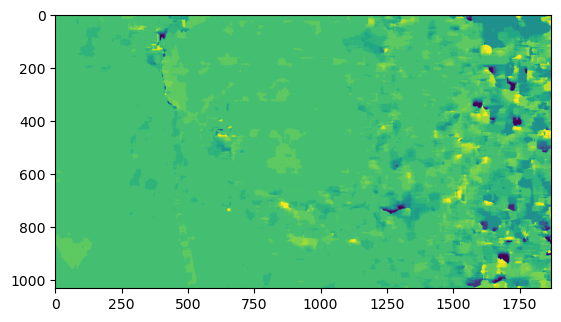

In [12]:
#observe DFD results
imgplot_1 = plt.imshow(DFDy)
np.mean(DFDy)

DFD shape:  (1030, 1870)


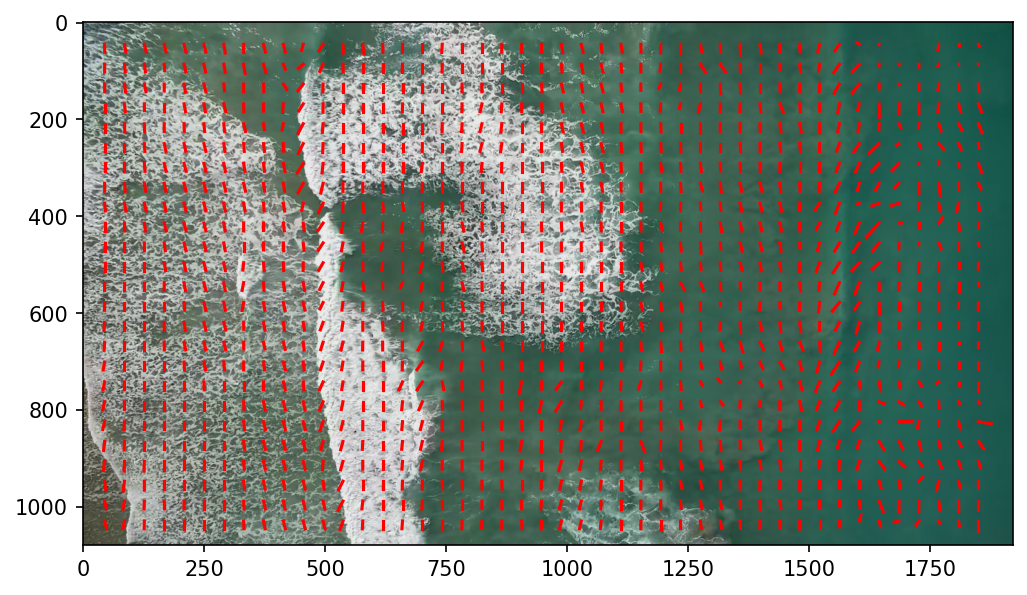

In [13]:
#plot flow vector without compensation
windowSpanX=20
windowSpanY=20

f=plt.figure(dpi=150)
f.set_figwidth(8)
f.set_figheight(12)

print("DFD shape: ", DFD.shape)
(DFDheight,DFDwidth)=DFD.shape

imgplot_1 = plt.imshow(img_ref)
for x in range(windowSpanX, DFDwidth-windowSpanX, 2*windowSpanX+1 ):
    for y in range(windowSpanY, DFDheight-windowSpanY, 2*windowSpanY+1 ):
        vX=np.mean(DFDx[y-windowSpanY:y+windowSpanY,x-windowSpanX:x+windowSpanX])
        vY=np.mean(DFDy[y-windowSpanY:y+windowSpanY,x-windowSpanX:x+windowSpanX])
        vX0=x + searchRange + tileSpan
        vY0=y + searchRange + tileSpan
        #print(vX0, vX0+vX , vY0, vY0+vY)
        plt.plot([vX0, vX0+4*vX], [vY0, vY0+4*vY], 'r')

Compesantion vector Y:  5.0
DFD shape:  (1030, 1870)


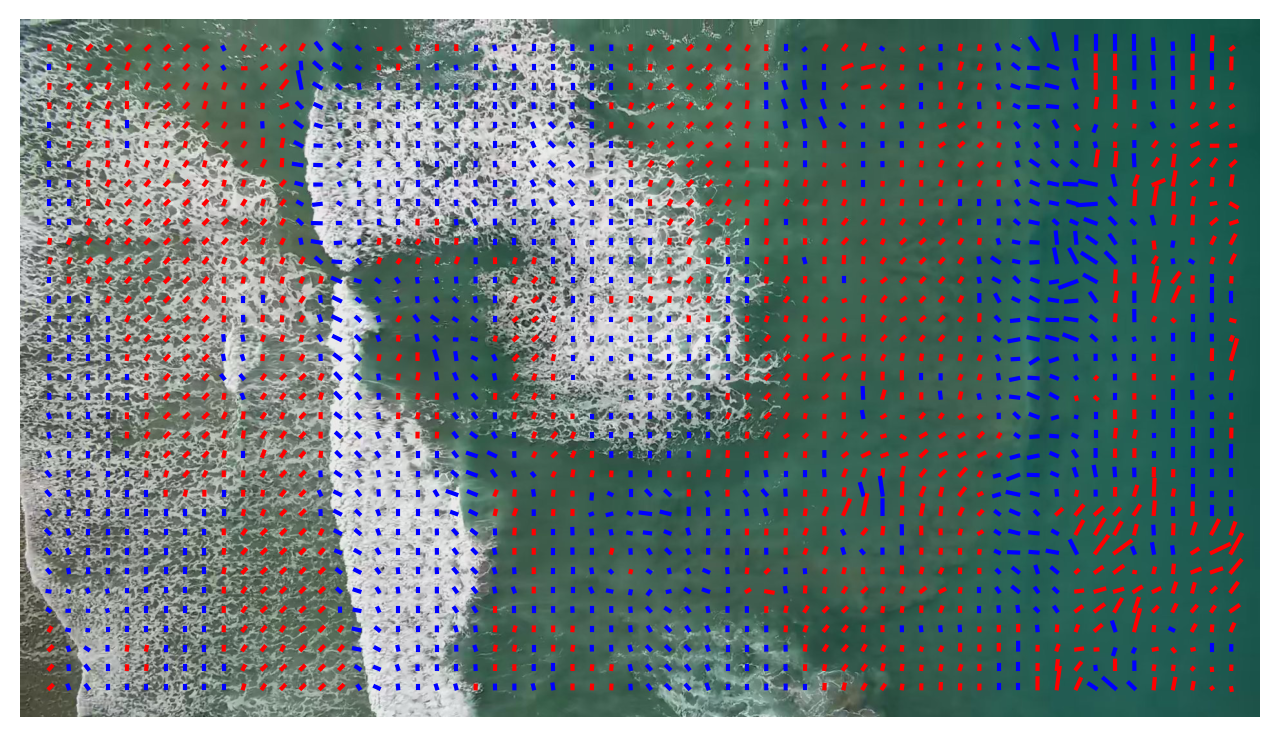

In [20]:
#plot DFD flow vector with drone speed compensation
windowSpanX=20
windowSpanY=20
windowShiftX=30
windowShiftY=30
#compensation parameters
speedY=5 #m/s
frameRate=10 #Hz
pixelSize=0.1 #m
compensateY= speedY / frameRate / pixelSize
print("Compesantion vector Y: ", compensateY)


f=plt.figure(dpi=200)
f.set_figwidth(8)
f.set_figheight(12)

print("DFD shape: ", DFD.shape)
(DFDheight,DFDwidth)=DFD.shape
imgplot_1 = plt.imshow(img_ref)

for x in range(windowSpanY, DFDwidth-windowSpanX+1, windowShiftX ):
    for y in range(windowSpanY, DFDheight-windowSpanY+1, windowShiftY):
        vX=np.mean(DFDx[y-windowSpanY:y+windowSpanY,x-windowSpanX:x+windowSpanX])
        vY=np.mean(DFDy[y-windowSpanY:y+windowSpanY,x-windowSpanX:x+windowSpanX])
        vX0=x + searchRange + tileSpan
        vY0=y + searchRange + tileSpan
        #print(vX0, vX0+vX , vY0, vY0+vY)
        if vX>0:
            lineColor='r'
        else:
            lineColor='b'    
        plt.plot([vX0, vX0+4*vX], [vY0, vY0+4*(vY-compensateY)], lineColor)
plt.axis('off')
plt.savefig('DFD1_test.png',bbox_inches='tight', pad_inches = 0)

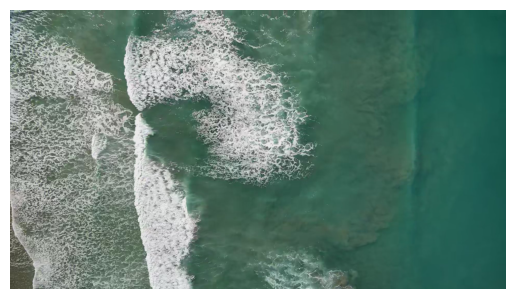

In [18]:
img_ref = mpimg.imread(pathImage + filename) / 256
imgplot_1 = plt.imshow(img_ref)
plt.axis('off')
plt.savefig('DFD1_test.png',bbox_inches='tight', pad_inches = 0)

In [7]:
#perform DFD analysis over images and save them
start = time.time()
imagePrefix='DFD1_gimbal0_'
imageSuffix='.png'

tileSpan=15
dimX=1920
dimY=1080
searchRange=10
searchStep=1

idxStart=0

for m in range(2800,3150):
    idxFile=m
    filename=filePrefix + str(idxFile + idxStart) + fileSuffix
    img_ref = mpimg.imread(pathImage + filename) / 256
    DFD=np.ones((dimY-2*searchRange-2*tileSpan, dimX-2*searchRange-2*tileSpan))
    (dimDFDy,dimDFDx)=DFD.shape
    print("File: ", filename)
    DFDx=np.zeros((dimY-2*searchRange-2*tileSpan, dimX-2*searchRange-2*tileSpan))
    DFDy=np.zeros((dimY-2*searchRange-2*tileSpan, dimX-2*searchRange-2*tileSpan))

    idxFile=m+1
    filename=filePrefix + str(idxFile + idxStart) + fileSuffix
    img_compare = mpimg.imread(pathImage + filename) / 256

    for i in range(-searchRange, searchRange+searchStep, searchStep):
        #print("step i: ", i)
        for j in range(-searchRange, searchRange+searchStep, searchStep):
            refX1 = searchRange
            refX2 = dimX - searchRange
            refY1 = searchRange
            refY2 = dimY - searchRange
            #print("ref: ", refX1, refX2, refY1, refY2)
            ref = img_ref[refY1:refY2, refX1:refX2, :]
            #print("ref shape: ", ref.shape)
            diffX1 = searchRange + i
            diffX2 = dimX - searchRange + i 
            diffY1 = searchRange + j
            diffY2 = dimY - searchRange + j
            #print("diff: ", diffX1, diffX2, diffY1, diffY2)
            compare = img_compare[diffY1:diffY2, diffX1:diffX2, :]
            diff3=(ref-compare)**2
            diff=(diff3[:,:,0]+diff3[:,:,1]+diff3[:,:,2]) / 3
            #print("diff shape: ", compare.shape)
            tSum=np.zeros((dimY-2*searchRange-2*tileSpan, dimX-2*searchRange-2*tileSpan))
            #print("sum shape: ", sum.shape)
            dimDiffY=diff.shape[0]
            dimDiffX=diff.shape[1]
            for x in range(-tileSpan, tileSpan + 1):
                for y in range(-tileSpan, tileSpan + 1):
                    #print(tileSpan+y, dimDiffY-tileSpan+y)
                    #print(tileSpan+x, dimDiffX-tileSpan+x)
                    tSum += diff[tileSpan+y:dimDiffY-tileSpan+y, tileSpan+x:dimDiffX-tileSpan+x]
            tSum = tSum / (tileSpan + 1)**2
            #print("sum complete")
            for x in range(dimDFDx):
                for y in range(dimDFDy):
                    if tSum[y,x]<DFD[y,x]:
                        DFD[y,x]=tSum[y,x]
                        DFDx[y,x]=i
                        DFDy[y,x]=j
    end = time.time()
    print(end - start)

    #filename=filePrefix + str(idxFile + idxStart) + fileSuffix
    np.save(pathImage + filePrefix +"DFD_" + str(m + idxStart), DFD)
    np.save(pathImage + filePrefix +"DFDx_" + str(m + idxStart), DFDx)
    np.save(pathImage + filePrefix +"DFDy_" + str(m + idxStart), DFDy)
    
    windowSpanX=20
    windowSpanY=20
    windowShiftX=30
    windowShiftY=30
    #compensation parameters
    speedY=5 #m/s
    frameRate=10 #Hz
    pixelSize=0.1 #m
    compensateY= speedY / frameRate / pixelSize
    #print("Compesantion vector Y: ", compensateY)

    

    f=plt.figure(dpi=200)
    f.set_figwidth(8)
    f.set_figheight(12)

    (DFDheight,DFDwidth)=DFD.shape
    imgplot_1 = plt.imshow(img_ref)
    for x in range(windowSpanY, DFDwidth-windowSpanX+1, windowShiftX ):
        for y in range(windowSpanY, DFDheight-windowSpanY+1, windowShiftY):
            vX=np.mean(DFDx[y-windowSpanY:y+windowSpanY,x-windowSpanX:x+windowSpanX])
            vY=np.mean(DFDy[y-windowSpanY:y+windowSpanY,x-windowSpanX:x+windowSpanX])
            vX0=x + searchRange + tileSpan
            vY0=y + searchRange + tileSpan
            #print(vX0, vX0+vX , vY0, vY0+vY)
            if vX>0:
                lineColor='r'
            else:
                lineColor='b'
            vX1=vX0+4*vX
            vY1=vY0+4*(vY-compensateY)
            if vX1<0:
                vX1=0
            if vY1<0:
                vY1=0
            if vX1>dimX-1:
                vX1=dimX-1
            if vY1>dimY-1:
                vY1=dimY-1
            plt.plot([vX0, vX1], [vY0, vY1], lineColor)
    plt.axis('off')
    filename=imagePrefix + str(m + idxStart) + imageSuffix    
    plt.savefig(pathImage + filename, bbox_inches = 'tight', pad_inches = 0)
    plt.close()

File:  gimbal0_2800.jpg


KeyboardInterrupt: 